# CUSTOMER CHURN PREDICTION
## Áp dụng quy trình chuẩn CRISP-DM

Quy trình CRISP-DM bao gồm 6 giai đoạn:
1. **Business Understanding:** Hiểu mục tiêu kinh doanh.
2. **Data Understanding:** Thu thập và khám phá dữ liệu.
3. **Data Preparation:** Làm sạch và xử lý dữ liệu.
4. **Modeling:** Xây dựng và huấn luyện mô hình.
5. **Evaluation:** Đánh giá kết quả mô hình.
6. **Deployment:** Triển khai mô hình vào thực tế.

---
## GIAI ĐOẠN 1: BUSINESS UNDERSTANDING (Hiểu nghiệp vụ)
**Mục tiêu:** Dự đoán khách hàng có nguy cơ rời bỏ dịch vụ (Churn) để có phương án giữ chân kịp thời.

**Input:** Dữ liệu lịch sử khách hàng (Hành vi, thanh toán, thông tin cá nhân).
**Output:** Phân loại khách hàng (Rời bỏ / Ở lại) và xác suất rời bỏ.

In [14]:
# Cài đặt thư viện và Import module
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

# Thêm đường dẫn đến folder src chứa code xử lý
sys.path.append("..")

# Import các module tự viết (theo cấu trúc Engineering)
import src.preprocessing as prep
import src.modeling as md
import src.predict as pred

# Reload module để cập nhật code mới nhất nếu có sửa file .py
importlib.reload(prep)
importlib.reload(md)
importlib.reload(pred)

print("Môi trường đã sẵn sàng!")

Môi trường đã sẵn sàng!


---
## GIAI ĐOẠN 2: DATA UNDERSTANDING (Hiểu dữ liệu)
Khám phá dữ liệu (EDA) để tìm ra các mẫu (patterns), xu hướng và mối quan hệ giữa các biến.

In [15]:
# 2.1 Load dữ liệu
df = prep.load_data("../data/customer_churn.csv")
print(f"Kích thước bộ dữ liệu: {df.shape}")
df.head()

Kích thước bộ dữ liệu: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


C:\Users\Huu~ Kieu`\AppData\Local\Temp\ipykernel_13188\1849555250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="pastel")


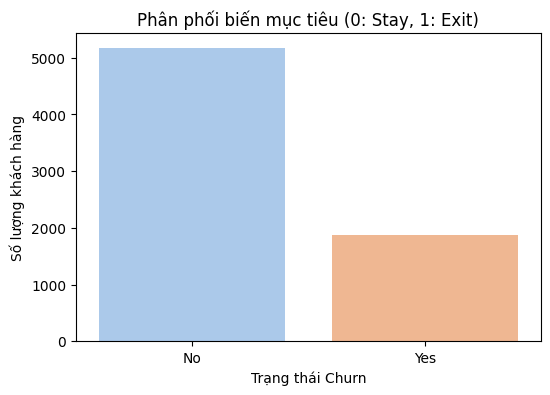

In [16]:
# 2.2 Kiểm tra biến mục tiêu (Target Variable)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn", palette="pastel")
plt.title("Phân phối biến mục tiêu (0: Stay, 1: Exit)")
plt.xlabel("Trạng thái Churn")
plt.ylabel("Số lượng khách hàng")
plt.show()

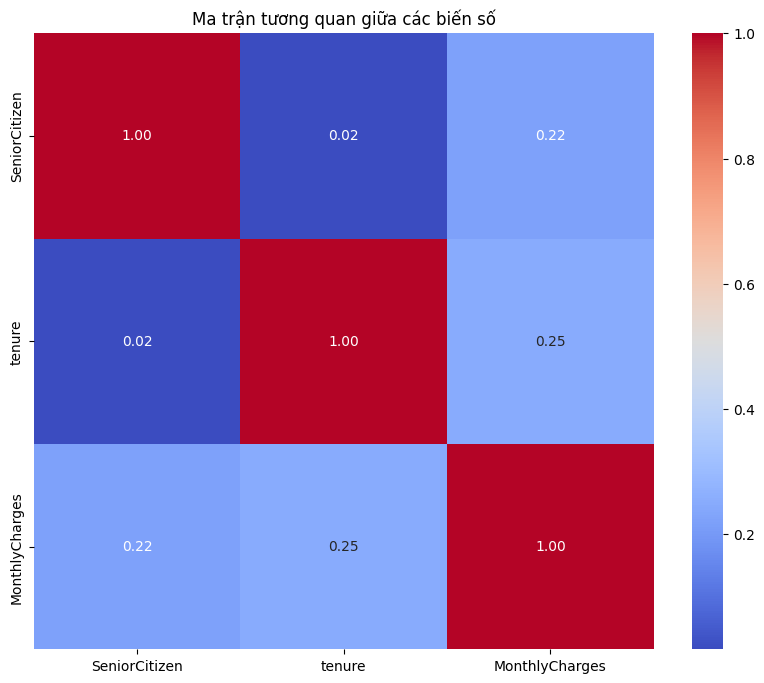

In [17]:
# 2.3 Xem xét mối tương quan (Correlation)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Ma trận tương quan giữa các biến số")
plt.show()

---
## GIAI ĐOẠN 3: DATA PREPARATION (Chuẩn bị dữ liệu)
Giai đoạn này tốn nhiều thời gian nhất, bao gồm:
- Xử lý giá trị thiếu (Missing values).
- Mã hóa dữ liệu phân loại (Encoding).
- Chia tập huấn luyện/kiểm thử (Train/Test Split).
- Chuẩn hóa dữ liệu (Scaling).

In [18]:
# Gọi hàm preprocess từ module src/preprocessing.py
# Hàm này đã đóng gói toàn bộ logic xử lý để đảm bảo nhất quán
X_train, X_test, y_train, y_test, feature_names = prep.preprocess(df, save_artifacts_path="../models/")

print("Dữ liệu đã sẵn sàng cho mô hình hóa.")
print("- Tập Train:", X_train.shape)
print("- Tập Test:", X_test.shape)

Dữ liệu đã sẵn sàng cho mô hình hóa.
- Tập Train: (5634, 19)
- Tập Test: (1409, 19)


---
## GIAI ĐOẠN 4: MODELING (Mô hình hóa)
Chúng ta sẽ thử nghiệm nhiều thuật toán khác nhau để tìm ra thuật toán phù hợp nhất:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. SVM (Support Vector Machine)

In [19]:
# Huấn luyện và so sánh các mô hình thông qua hàm train_and_evaluate
best_model, results = md.train_and_evaluate(X_train, y_train, X_test, y_test)

Model                | Accuracy   | AUC       
----------------------------------------------
Logistic Regression  | 0.7991     | 0.8403
Decision Tree        | 0.7296     | 0.6575
Random Forest        | 0.7878     | 0.8247
SVM RBF              | 0.7935     | 0.7909
----------------------------------------------
Best Model: LogisticRegression()


---
## GIAI ĐOẠN 5: EVALUATION (Đánh giá)
Đánh giá kỹ lưỡng mô hình tốt nhất dựa trên các chỉ số Accuracy, AUC và Feature Importance.

,accuracy,auc
Logistic Regression,0.799148,0.84028
Random Forest,0.787793,0.824679
SVM RBF,0.793471,0.790881
Decision Tree,0.729595,0.65751


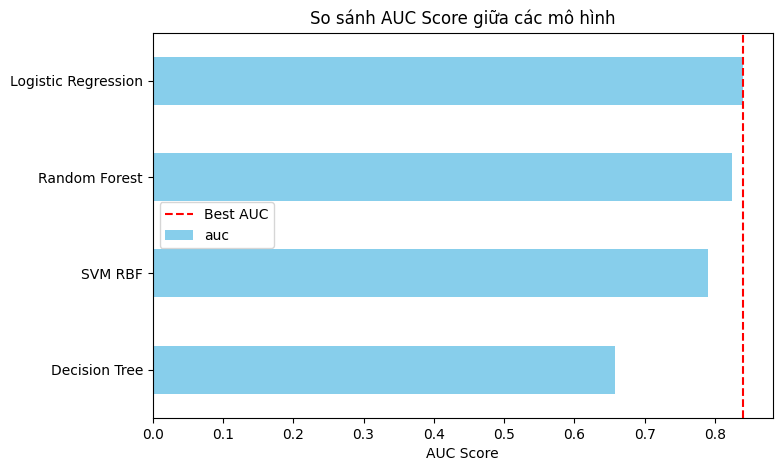

In [20]:
# 5.1 So sánh hiệu suất các mô hình
results_df = pd.DataFrame(results).T
display(results_df[["accuracy", "auc"]].sort_values(by="auc", ascending=False))

# Trực quan hóa AUC Score
results_df["auc"].sort_values().plot(kind="barh", figsize=(8,5), color="skyblue")
plt.title("So sánh AUC Score giữa các mô hình")
plt.xlabel("AUC Score")
plt.axvline(x=results_df["auc"].max(), color='r', linestyle='--', label='Best AUC')
plt.legend()
plt.show()

In [21]:
# 5.2 Feature Importance (Mức độ quan trọng của các đặc trưng)
# Giúp hiểu yếu tố nào tác động mạnh nhất đến việc khách hàng rời bỏ

if hasattr(best_model, 'feature_importances_'):
    fi_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": best_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(data=fi_df.head(10), x="Importance", y="Feature", palette="viridis")
    plt.title("Top 10 Yếu tố quan trọng nhất (Feature Importance)")
    plt.show()
else:
    print("Mô hình tốt nhất không hỗ trợ trích xuất Feature Importance trực tiếp.")

Mô hình tốt nhất không hỗ trợ trích xuất Feature Importance trực tiếp.


---
## GIAI ĐOẠN 6: DEPLOYMENT (Triển khai)
Đóng gói mô hình và đưa vào sử dụng thực tế (Lưu model, Test dự đoán).

In [22]:
# 6.1 Lưu mô hình
md.save_model(best_model, "../models/model.pkl")

# 6.2 Test quy trình dự đoán (Giả lập môi trường Production)
print("\n--- TEST DỰ ĐOÁN MỘT KHÁCH HÀNG MỚI ---")

# Load lại model và scaler (giả lập môi trường production)
loaded_model = pred.load_model("../models/model.pkl")

# Lấy thử 1 dòng dữ liệu từ tập test để demo
# Lưu ý: Trong thực tế, dữ liệu này sẽ đến từ giao diện người dùng nhập vào
sample_input = X_test[0] 

# Chạy dự đoán
pred_label = loaded_model.predict([sample_input])[0]
pred_prob = loaded_model.predict_proba([sample_input])[0][1]

print("-" * 30)
if pred_label == 1:
    print(f"KẾT QUẢ: KHÁCH HÀNG CÓ NGUY CƠ RỜI BỎ (Churn) - Xác suất: {pred_prob:.2%}")
else:
    print(f"KẾT QUẢ: KHÁCH HÀNG TRUNG THÀNH (Stay) - Xác suất: {pred_prob:.2%}")
print("-" * 30)

Đã lưu model tại: ../models/model.pkl

--- TEST DỰ ĐOÁN MỘT KHÁCH HÀNG MỚI ---
------------------------------
KẾT QUẢ: KHÁCH HÀNG TRUNG THÀNH (Stay) - Xác suất: 4.52%
------------------------------
